#Data Loading

In [ ]:
!wget https://github.com/SaadatChowdhury/BHaND/raw/master/Dataset/bhand.pkl.gz

--2022-03-07 10:08:12--  https://github.com/SaadatChowdhury/BHaND/raw/master/Dataset/bhand.pkl.gz
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SaadatChowdhury/BHaND/master/Dataset/bhand.pkl.gz [following]
--2022-03-07 10:08:12--  https://raw.githubusercontent.com/SaadatChowdhury/BHaND/master/Dataset/bhand.pkl.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56765749 (54M) [application/octet-stream]
Saving to: ‘bhand.pkl.gz’

bhand.pkl.gz        100%[===================>]  54.14M   123MB/s    in 0.4s    

2022-03-07 10:08:13 (123 MB/s) - ‘bhand.pkl.gz’ saved [56765749/56765749]



In [ ]:
import gzip
import pickle
import numpy as np

f = gzip.open('/content/bhand.pkl.gz','rb')
trainSet,validSet,testSet = pickle.load(f, encoding = 'bytes')
f.close()


In [ ]:
X_train, y_train = trainSet
X_val, y_val = validSet
X_test, y_test = testSet

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_val = np.asarray(X_val)
y_val = np.asarray(y_val)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

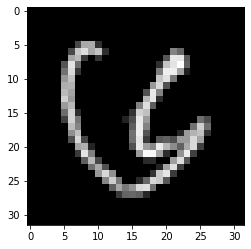

In [ ]:
import matplotlib.pyplot as plt
img = np.resize(X_train[0], (32,32))
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
y_train[0]

6

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
print(len(X_train)+len(X_val)+len(X_test)
)

70000


In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:

X_train = X_train.astype('float32').reshape(-1,32,32,1)
X_val = X_val.astype('float32').reshape(-1,32,32,1)
X_test = X_test.astype('float32').reshape(-1,32,32,1)

In [ ]:
train_labels_one_hot = to_categorical(y_train)
test_labels_one_hot = to_categorical(y_test)
valid_labels_one_hot=to_categorical(y_val)

In [ ]:
X_train.shape

(50000, 32, 32, 1)

In [ ]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same",input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (2, 2),padding="same" ,activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.30))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         7

In [ ]:
model.compile(loss=losses.categorical_crossentropy, optimizer=optimizers.Adam(),metrics=['accuracy'])

In [ ]:

es = EarlyStopping(monitor='val_loss', mode='min',patience=3, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min')

In [ ]:
batch_size=64
epochs=10

training_history = model.fit(X_train, train_labels_one_hot,
                             batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(X_val, valid_labels_one_hot),callbacks=[es,mc]
                              )


Epoch 1/10
782/782 [==============================] - 21s 14ms/step - loss: 0.4189 - accuracy: 0.8620 - val_loss: 0.1010 - val_accuracy: 0.9698
Epoch 2/10
782/782 [==============================] - 12s 16ms/step - loss: 0.1274 - accuracy: 0.9638 - val_loss: 0.0627 - val_accuracy: 0.9812
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 0.0888 - accuracy: 0.9751 - val_loss: 0.0534 - val_accuracy: 0.9832
Epoch 4/10
782/782 [==============================] - 11s 14ms/step - loss: 0.0704 - accuracy: 0.9804 - val_loss: 0.0421 - val_accuracy: 0.9879
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 0.0568 - accuracy: 0.9840 - val_loss: 0.0467 - val_accuracy: 0.9875
Epoch 6/10
782/782 [==============================] - 10s 12ms/step - loss: 0.0517 - accuracy: 0.9857 - val_loss: 0.0337 - val_accuracy: 0.9910
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss: 0.0442 - accuracy: 0.9873 - val_loss: 0.0348 - val_accuracy:

In [ ]:
model.evaluate(X_test,test_labels_one_hot)

313/313 [==============================] - 2s 5ms/step - loss: 0.0288 - accuracy: 0.9931


[0.028830507770180702, 0.9930999875068665]

In [ ]:
X_train = X_train.astype('float32').reshape(-1,32,32,1)
predicted_classes = model.predict(X_train)

In [ ]:
len(predicted_classes)

50000

In [ ]:
pred=[]
for i in range(len(predicted_classes)):
   pred.append(np.argmax(np.round(predicted_classes[i])))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  if sys.path[0] == '':


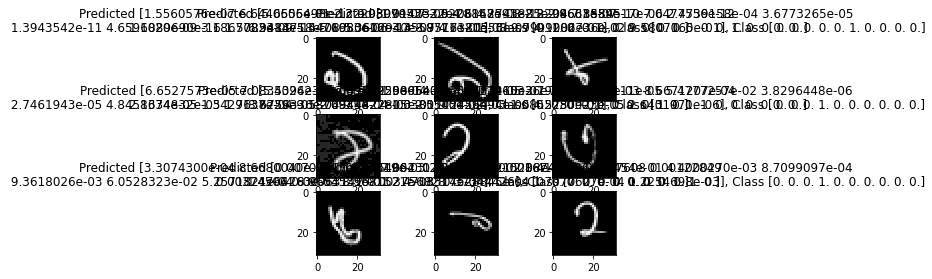

In [ ]:
#X_train, y_train = trainSet
#X_val, y_val = validSet
#X_test, y_test = testSet
correct = np.where(predicted_classes==y_test)[0]
cnt = 0
for i in range (0,len(y_train)):
  if(pred[i]!=y_train[i]):
    
    plt.subplot(3,3,cnt+1)
    plt.imshow(X_train[i].reshape(32,32), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i], test_labels_one_hot[i]))
    plt.tight_layout()
    cnt+=1
    if(cnt==9):
      break